**Rede Neural**

Objetivo: Encontrar o menor conjunto de pesos para cada atributo para aproximar o resultado. Os pesos são iniciados aleatoriamente.

- Perceptron de uma camada: Possui entradas que possuem pesos que são somados e depois aplicados em uma função de ativação. 

- Redes multicamada:

Adicionar mais camadas para resolver problemas não linearmente separaveis. São necessárias redes neurais mais complexas para resolver problemas.

Função sigmoid: Não retorna valores negativos.

Descida do gradiente: Valores da camada oculta -> soma -> função de ativação. A descida do gradiente busca encontrar o conjunto de pesos que resulte no menor erro possível. Cálculo da derivada ajuda a encontrar o local em que o erro é o menor possível. O resultado da derivada diz se deve aumentar ou diminuir o peso.

Cálculo do parâmetro Delta: Função de ativação -> derivada da função -> delta -> gradiente. Levar em consideração a camada de saída. O parâmetro delta diz respeito a forma que o peso deve se comportar, se ele deve aumentar ou deve diminuir.

Ajuste dos pesos com backpropagation: momento pode acelerar o processo de encontrar o minimo global.


Peso = (peson + momento) + (entrada * delta * taxa de aprendizagem)

Backpropagation: Atualiza os pesos da camada de saída e depois volta atualizando as camadas anteriores. 

Redes feedfowards: Atualizam os pesos de trás para frente, a partir da camada de saída para a camada de entrada.

Cada atualização peso é denominado de época

Bias: Adiciona-se neurônios adicionais nas camadas para evitar que sempre se tema os menos valores de saída

Mean absolute error: resposta correta - resposta calculada > mais simples

Mean square error (MSE): penaliza mais o erro. Permite o algoritmo se adaptar melhor

Root MSE: Aplicar a radiciação no MSE.

Descida do gradiente estocatisca: calcula o erro para cada registro do dataset e propaga o erro. Evita minimos locais, além de pode ser considerado mais rápido

Mini batch gradient descent: Escolha de um número de registros para executar e atualizar os pesos.

Learning rate = taxa de aprendizagem

Batch size = tamanho do lote

Epochs = épocas. Número de épocas = número de vezes que os pesos serão atualizados..

Pixels e redes neurais: uma imagem possui diversos pixels.

Representação: conjunto de pixels; classe da imagem

Enviar para a rede neural cada pixel da imagem

Quanto maior a estrutura da imagem de entrada mais complexa será a arquitetura da rede neural.

As imagens precisam ter o mesmo tamanho. Pois os neurônios de entrada da rede neural são limitados.

Cada pixel é enviado para um neurônio da rede neural. É necessário também converter a imagem que está em matriz para um vetor para ser dado como entrada para a rede neural.



In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Importando as bibliotecas
import cv2 
import numpy as np
import zipfile
import os
from google.colab.patches import cv2_imshow

import tensorflow as tf
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
tf.__version__

'2.8.0'

**Extração dos pixels das imagens**

In [4]:
path = '/content/drive/MyDrive/Mestrado/Cursos - Udemy/Visão computacional/Recursos/Visão Computacional Guia Completo/Datasets/homer_bart_1.zip'

zip_object = zipfile.ZipFile(file = path, mode = 'r')
zip_object.extractall('./')
zip_object.close()

In [5]:
diretorio = '/content/homer_bart_1'

arquivos = [os.path.join(diretorio, f) for f in sorted(os.listdir(diretorio))]

In [6]:
# Redizindo o tamanho das imagens, pois as redes neurais possuem número limitado de neurônios na entrada
largura, altura = 128, 128

In [ ]:
imagens = [] # pixels da imagem
classes = [] # classe da imagem

In [ ]:
for arquivo in arquivos:
  try:
    imagem = cv2.imread(arquivo)
    (H, W) = imagem.shape[:2]
  except:
    continue
  
  # Redimensionando a imagem e convertendo-a para escala de cinza.
  imagem = cv2.resize(imagem, (largura, altura))
  imagem = cv2.cvtColor(imagem, cv2.COLOR_BGR2GRAY)

  # Convertendo de matriz para vetor
  imagem = imagem.ravel()
  imagens.append(imagem)

  # Classes
  nome_imagem = os.path.basename(os.path.normpath(arquivo))

  if nome_imagem.startswith('b'):
    classe = 0 # Bart
  else:
    classe = 1 # Homer

  classes.append(classe)
  

In [ ]:
# Convertendo para array
X = np.asarray(imagens) # Itens a serem preditos
y = np.asarray(classes)  # Classes dos itens

In [ ]:
X.shape

(269, 16384)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


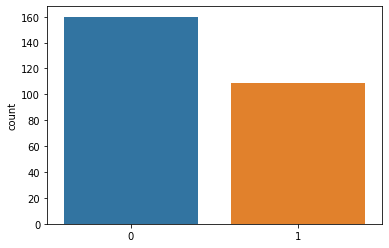

In [ ]:
sns.countplot(y)

In [ ]:
np.unique(y, return_counts=True)

(array([0, 1]), array([160, 109]))

**Normalização dos dados**

Busca deixar os valores em uma mesma escala

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [ ]:
X[0]. max(), X.min()

(1.0000000000000002, 0.0)

**Divisão da base em treino e teste**

Uma parte é usada para aprender os pesos -> Treino

Outra parte é usada para testar o modelo -> Teste

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(X, y, test_size = 0.2, random_state = 1) # test_size -> Porcentagem da base de dados que será usada para teste.

**Construção e treinamento da rede neural**

In [ ]:
# Calculo número units:
# Dimensões da imagem: kargura x altura = 128 * 128 = 16384
(16384 +2) / 2


In [ ]:
rede1 = tf.keras.models.Sequential()

# Adicionado as camadas
# Camada de entrada e 1ª camada oculta
rede1.add(tf.keras.layers.Dense(input_shape = (16384, ), units = 8193, activation = 'relu')) # Dense() -> Um neurônio de uma camada está ligado com todos os neurônios de outra camada. input_shape = (16384, ) -> tamanho da camada de entrada, valor equivalente a quantidade de pixels da entrada
# units = 8193 -> quantidade de neurônios da camada de entrada
# activation = 'relu' -> função de ativação. Relu -> padrão para redes neurais

# 2ª camada oculta
rede1.add(tf.keras.layers.Dense(units = 8193, activation = 'relu'))

# Camada de saída
rede1.add(tf.keras.layers.Dense(units = 1, activation = 'sigmoid'))
# activation = 'sigmoid' = retorna uma probabilidade

In [ ]:
rede1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 8193)              134242305 
                                                                 
 dense_5 (Dense)             (None, 8193)              67133442  
                                                                 
 dense_6 (Dense)             (None, 1)                 8194      
                                                                 
Total params: 201,383,941
Trainable params: 201,383,941
Non-trainable params: 0
_________________________________________________________________


In [ ]:
rede1.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics=['accuracy']) # optimizer -> algoritmo para ajuste de pesos e encontrar o minimo global
# loss -> função utilizada para calcular o erro
# metrics -> métrica de avaliação da rde

In [ ]:
# Treinando
historico = rede1.fit(X_treinamento, y_treinamento, epochs = 50)

Epoch 1/50
7/7 [==============================] - 0s 49ms/step - loss: 0.1326 - accuracy: 0.9674
Epoch 2/50
7/7 [==============================] - 0s 46ms/step - loss: 0.1276 - accuracy: 0.9628
Epoch 3/50
7/7 [==============================] - 0s 46ms/step - loss: 0.0897 - accuracy: 0.9814
Epoch 4/50
7/7 [==============================] - 0s 46ms/step - loss: 0.0714 - accuracy: 1.0000
Epoch 5/50
7/7 [==============================] - 0s 45ms/step - loss: 0.0675 - accuracy: 0.9953
Epoch 6/50
7/7 [==============================] - 0s 45ms/step - loss: 0.0622 - accuracy: 0.9907
Epoch 7/50
7/7 [==============================] - 0s 45ms/step - loss: 0.0790 - accuracy: 0.9721
Epoch 8/50
7/7 [==============================] - 0s 45ms/step - loss: 0.0458 - accuracy: 0.9953
Epoch 9/50
7/7 [==============================] - 0s 46ms/step - loss: 0.0484 - accuracy: 0.9907
Epoch 10/50
7/7 [==============================] - 0s 45ms/step - loss: 0.0430 - accuracy: 0.9907
Epoch 11/50
7/7 [============

**Avaliação da rede neural**

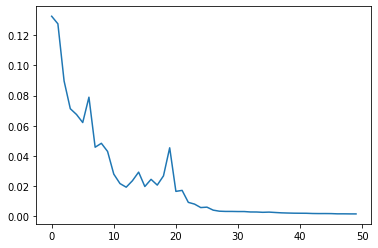

In [ ]:
plt.plot(historico.history['loss']);

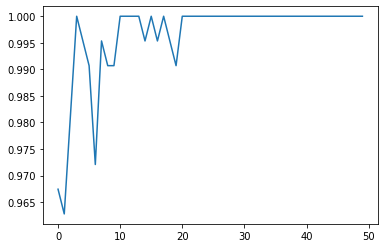

In [ ]:
plt.plot(historico.history['accuracy']);

In [ ]:
previsoes = rede1.predict(X_teste)

In [ ]:
# 0 -> false -> bart
# 1 -> true -> homer
previsoes = (previsoes > 0.5)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_teste, previsoes)

0.7037037037037037

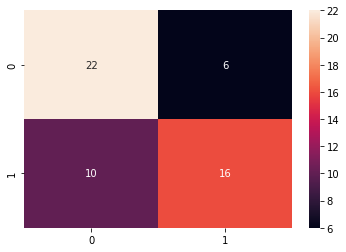

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_teste, previsoes)
sns.heatmap(cm, annot = True)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_teste, previsoes))

              precision    recall  f1-score   support

           0       0.69      0.79      0.73        28
           1       0.73      0.62      0.67        26

    accuracy                           0.70        54
   macro avg       0.71      0.70      0.70        54
weighted avg       0.71      0.70      0.70        54



**Salvando e carregando a rede neural**

In [ ]:
model_json = rede1.to_json()

with open('rede1.json', 'w') as json_file:
  json_file.write(model_json)

In [ ]:
from keras.models import save_model
rede_salva = save_model(rede1, 'weights1.hdf5')

In [ ]:
with open('rede1.json') as json_file:
  json_saved_model = json_file.read()

In [ ]:
rede_carregada = tf.keras.models.model_from_json(json_saved_model)
rede_carregada.load_weights('/content/weights1.hdf5')
rede_carregada.compile(loss = 'binary_crossentropy', optimizer = 'Adam', metrics = ['accuracy'])

In [ ]:
rede_carregada.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 8193)              134242305 
                                                                 
 dense_5 (Dense)             (None, 8193)              67133442  
                                                                 
 dense_6 (Dense)             (None, 1)                 8194      
                                                                 
Total params: 201,383,941
Trainable params: 201,383,941
Non-trainable params: 0
_________________________________________________________________


**Testes com classificação de imagens**

In [ ]:
# Transformando a imagem de vetor de pixels para matriz
imagem_teste = X_teste[0]
imagem_teste = scaler.inverse_transform(imagem_teste.reshape(1, -1))

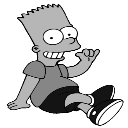

In [ ]:
cv2_imshow(imagem_teste.reshape(128,128))

In [ ]:
# Predizendo a classe do elemento
if rede_carregada.predict(imagem_teste)[0][0] < 0.5:
  print('Bart')
else:
  print('Homer')

Bart


**Extração de características**

Identificar caractetristicas únicas de cada classe. Por exemplo: cores.

Permite reduzir a quantidade de neuônios da camada de entrada da rede. Também reduz a complexidade da base de dados.

In [7]:
export = 'boca,calca,sapatos,camisa,calcao,tenis,classe\n' # cabecalho do arquivo

In [8]:
mostrar_imagens = False
caracteristicas = []

In [9]:
# Extrator de características
for arquivo in arquivos:
  try:
    imagem_original = cv2.imread(arquivo)
    (H, W) = imagem_original.shape[:2]
  except:
    continue
  
  imagem_alterada = imagem_original.copy()
  imagem_caracteristicas = []
  imagem_nome = os.path.basename(os.path.normpath(arquivo))
  boca = calca = sapato = 0
  camisa = calcao = tenis = 0

  if imagem_nome.startswith('b'):
    classe = 0
  else:
    classe = 1

  for altura in range(0, H):
    for largura in range(0, W):
      # RGB -> no openCv: BGR
      azul = imagem_alterada.item(altura, largura, 0)
      verde = imagem_alterada.item(altura, largura, 1)
      vermelho = imagem_alterada.item(altura, largura, 2)

      # Homer - marrom da boca
      if(azul >=95 and azul<=140 and verde>=160 and verde<=185 and vermelho>=175 and vermelho<=205):
        if mostrar_imagens:
          imagem_alterada[altura, largura] = [0, 255, 255]
        calca += 1

      # Homer - azul da calça
      if(azul >=150 and azul<=180 and verde>=98 and verde<=120 and vermelho>=0 and vermelho<=90):
        if mostrar_imagens:
          imagem_alterada[altura, largura] = [0, 255, 255]
        calca += 1

      if altura > (H/2):
        # Homer - cinza dos sapatos
        if(azul >=25 and azul<=45 and verde>=25 and verde<=45 and vermelho>=25 and vermelho<=45):
          if mostrar_imagens:
            imagem_alterada[altura, largura] = [0, 255, 255]
          sapato += 1

      # Bart - Laranja da camisa
      if(azul >=11 and azul<=50 and verde>=85 and verde<=105 and vermelho>=240 and vermelho<=255):
        if mostrar_imagens:
          imagem_alterada[altura, largura] = [0, 255, 128]
        camisa += 1
      
      # Bart - Azul do calcao
      if(azul >=125 and azul<=170 and verde>=0 and verde<=12 and vermelho>=0 and vermelho<=120):
        if mostrar_imagens:
          imagem_alterada[altura, largura] = [0, 255, 128]
        calcao += 1
      
      # Bart - Azul do tênis
      if altura > (H/2):
        if(azul >=125 and azul<=170 and verde>=0 and verde<=12 and vermelho>=0 and vermelho<=120):
          if mostrar_imagens:
            imagem_alterada[altura, largura] = [0, 255, 128]
          tenis += 1
  
  boca = round((boca / (H*W)* 100), 9) # Quantos % da imagem corresponde a característica
  calca = round((calca / (H*W)* 100), 9) 
  sapato = round((sapato / (H*W)* 100), 9) 

  camisa = round((camisa / (H*W)* 100), 9) 
  calcao = round((calcao / (H*W)* 100), 9) 
  tenis = round((tenis / (H*W)* 100), 9) 


  imagem_caracteristicas.append(boca)
  imagem_caracteristicas.append(calca)
  imagem_caracteristicas.append(sapato)

  imagem_caracteristicas.append(camisa)
  imagem_caracteristicas.append(calcao)
  imagem_caracteristicas.append(tenis)

  imagem_caracteristicas.append(classe)

  caracteristicas.append(imagem_caracteristicas)

  f = (','.join([str(item) for item in imagem_caracteristicas]))
  export += f + '\n'

  # Visualização da comparação das imagens
  if mostrar_imagens:
    imagem_alterada = cv2.cvtColor(imagem_alterada, cv2.COLOR_BGR2RGB)
    imagem_original = cv2.cvtColor(imagem_original, cv2.COLOR_BGR2RGB)
    figura, im = plt.subplots(1, 2)
    im[0].imshow(imagem_original)
    im[1].imshow(imagem_alterada)
    plt.show()

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1


In [10]:
with open('features.csv', 'w') as file:
  for linha in export:
    file.write(linha)
  file.closed

In [11]:
dataset = pd.read_csv('features.csv')
dataset

,boca,calca,sapatos,camisa,calcao,tenis,classe
0,0.0,0.000000,0.114799,6.886102,3.495204,3.495204,0
1,0.0,0.000000,0.110078,5.004901,3.183889,3.183889,0
2,0.0,0.000000,0.182519,5.264620,5.029683,5.029683,0
3,0.0,0.480168,0.080028,0.000000,0.000000,0.000000,0
4,0.0,0.000000,0.029708,8.978929,3.459119,3.459119,0
...,...,...,...,...,...,...,...
264,0.0,6.485412,0.171985,0.000000,0.000000,0.000000,1
265,0.0,0.000000,0.161637,0.000000,0.000000,0.000000,1
266,0.0,4.264975,0.329940,0.000000,0.000000,0.000000,1
267,0.0,1.429133,0.034559,0.000000,0.000000,0.000000,1


**Treinamento e teste**

In [15]:
X = dataset.iloc[:, 0:6].values # Converte também para o numpyarray

In [16]:
y = dataset.iloc[:, 6].values

In [18]:
from sklearn.model_selection import train_test_split
X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(X, y, test_size=0.2, random_state=1)

Número inicial de camadas:

(número de atributos + 2) / 2

In [12]:
# 6 -> 4 -> 4 -> 4
rede2 = tf.keras.Sequential()
rede2.add(tf.keras.layers.Dense(input_shape = (6,), units = 4, activation = 'relu'))
rede2.add(tf.keras.layers.Dense(units = 4, activation = 'relu'))
rede2.add(tf.keras.layers.Dense(units = 4, activation = 'relu'))
rede2.add(tf.keras.layers.Dense(units = 1, activation = 'sigmoid'))

In [13]:
rede2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 4)                 28        
                                                                 
 dense_1 (Dense)             (None, 4)                 20        
                                                                 
 dense_2 (Dense)             (None, 4)                 20        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 73
Trainable params: 73
Non-trainable params: 0
_________________________________________________________________


In [14]:
rede2.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])

In [20]:
historico = rede2.fit(X_treinamento, y_treinamento, epochs=50)

Epoch 1/50
7/7 [==============================] - 0s 8ms/step - loss: 0.4943 - accuracy: 0.8744
Epoch 2/50
7/7 [==============================] - 0s 10ms/step - loss: 0.4917 - accuracy: 0.8744
Epoch 3/50
7/7 [==============================] - 0s 9ms/step - loss: 0.4895 - accuracy: 0.8744
Epoch 4/50
7/7 [==============================] - 0s 7ms/step - loss: 0.4866 - accuracy: 0.8744
Epoch 5/50
7/7 [==============================] - 0s 8ms/step - loss: 0.4842 - accuracy: 0.8744
Epoch 6/50
7/7 [==============================] - 0s 7ms/step - loss: 0.4820 - accuracy: 0.8744
Epoch 7/50
7/7 [==============================] - 0s 12ms/step - loss: 0.4800 - accuracy: 0.8744
Epoch 8/50
7/7 [==============================] - 0s 7ms/step - loss: 0.4775 - accuracy: 0.8744
Epoch 9/50
7/7 [==============================] - 0s 7ms/step - loss: 0.4754 - accuracy: 0.8791
Epoch 10/50
7/7 [==============================] - 0s 7ms/step - loss: 0.4733 - accuracy: 0.8791
Epoch 11/50
7/7 [====================

**Avaliação da rede**

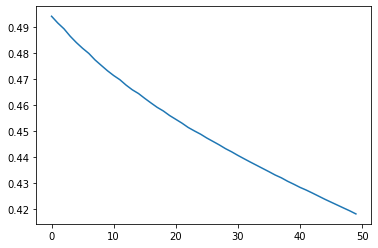

In [21]:
plt.plot(historico.history['loss'])

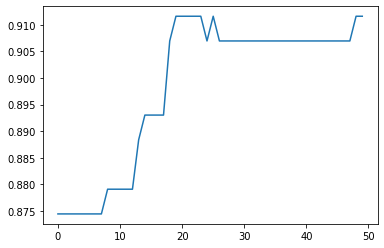

In [22]:
plt.plot(historico.history['accuracy'])

In [23]:
previsoes = rede2(X_teste)

In [24]:
previsoes = previsoes > 0.5

In [25]:
from sklearn.metrics import accuracy_score
accuracy_score(y_teste, previsoes)

0.9444444444444444

In [26]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_teste, previsoes)

In [27]:
cm

array([[27,  1],
       [ 2, 24]])

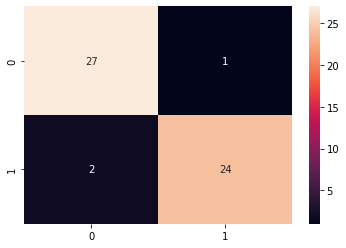

In [28]:
sns.heatmap(cm, annot=True)

In [29]:
from sklearn.metrics import classification_report
print(classification_report(y_teste, previsoes))

              precision    recall  f1-score   support

           0       0.93      0.96      0.95        28
           1       0.96      0.92      0.94        26

    accuracy                           0.94        54
   macro avg       0.95      0.94      0.94        54
weighted avg       0.94      0.94      0.94        54

